### Baseline Flow
1. Import packages
2. Import Data
3. Check Data 
4. Check Target Feature
5. Partition Data into Y and X (Choose Features)
6. Validation Data - Train Test Split
7. Preprocessing (as many steps)
8. Model
9. Make Predictions
10. Evalute metrics
11. Export Predictions

# **1/ Import Packages**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/playground-series-s4e9/sample_submission.csv
/kaggle/input/playground-series-s4e9/train.csv
/kaggle/input/playground-series-s4e9/test.csv


# 2/ Import Data


In [2]:
train = pd.read_csv('/kaggle/input/playground-series-s4e9/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s4e9/test.csv')

# 3/ Check Data

1. 5 rows
2. Check names with data type
3. Descriptive Stats
4. Target Feature

In [3]:
train.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


In [5]:
test.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,188533,Land,Rover LR2 Base,2015,98000,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,None reported,Yes
1,188534,Land,Rover Defender SE,2020,9142,Hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,Silver,Black,None reported,Yes
2,188535,Ford,Expedition Limited,2022,28121,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,White,Ebony,None reported,NaN
3,188536,Audi,A6 2.0T Sport,2016,61258,Gasoline,2.0 Liter TFSI,Automatic,Silician Yellow,Black,None reported,NaN
4,188537,Audi,A6 2.0T Premium Plus,2018,59000,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,None reported,Yes


# 4/ Check Target Feature

<Axes: ylabel='Frequency'>

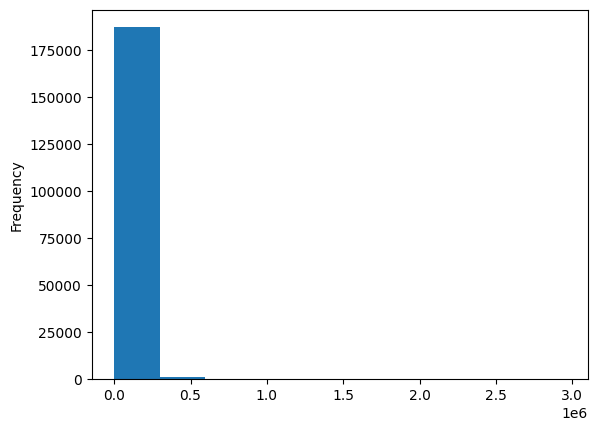

In [6]:
train['price'].plot.hist()

In [7]:
train['price'].describe()

count    1.885330e+05
mean     4.387802e+04
std      7.881952e+04
min      2.000000e+03
25%      1.700000e+04
50%      3.082500e+04
75%      4.990000e+04
max      2.954083e+06
Name: price, dtype: float64

# 5/ Partition into y and X

In [8]:
selected_features = ['model_year','milage']

In [9]:
#train
y = train['price']
X = train[selected_features]

In [10]:
#test
X_test = test[selected_features]

# 6/ Validation - TTS

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(150826, 2)
(37707, 2)
(150826,)
(37707,)


# 7/ Preprocessing

* Numerical
* Categorical


## Numerical Transformation
* Convert all to StandardScaler


In [13]:
# 1 - Import Package
# from sklearn.preprocessing import StandardScaler

# 2 - Create an Instance
num_scaler = StandardScaler()

# 3 - Fit an Instance
num_scaler.fit(X_train)

# 4 - Transform
X_train = num_scaler.transform(X_train)
X_val = num_scaler.transform(X_val)
X_test = num_scaler.transform(X_test)

# 8/ Model Building

In [14]:
# 1 - Import Package
from sklearn.linear_model import LinearRegression

# 2 - Create an Instance
model = LinearRegression()

# 3 - Fit an Instance
model.fit(X_train, y_train)

# 4 - Predict/Check
print(model.coef_)
print(model.intercept_)

[  5743.38622618 -18530.9456067 ]
43890.785315529116


# 9/ Predict

In [15]:
y_train_prediction = model.predict(X_train)
y_val_prediction = model.predict(X_val)
y_test_prediction = model.predict(X_test)

# 10/ Evaluation Metrics
* Rsquared
* RMSE
* MSE

In [16]:
from sklearn.metrics import mean_squared_error

print('train metrics')
print('MSE :', mean_squared_error(y_train, y_train_prediction))
print('RMSE :',mean_squared_error(y_train, y_train_prediction, squared = False))

print('val metrics')
print('MSE :',mean_squared_error(y_val, y_val_prediction))
print('RMSE :',mean_squared_error(y_val, y_val_prediction, squared = False))

train metrics
MSE : 5856119611.824684
RMSE : 76525.28740112437
val metrics
MSE : 5049104091.8709955
RMSE : 71057.04815055995
